## Assignment 3: $k$ Nearest Neighbor

`! git clone https://github.com/ds3001f25/knn_assignment.git`

**Do two questions in total: "Q1+Q2" or "Q1+Q3"**


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting? 
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Regresiion is predicting a numeric outcome, and predicting a categorical outcome is called classification
2. A confusion table cross-tabulates predicted and true labels. Correct predictions lie on the diagonal and mistakes off-diagonal, so you can see patterns in successes and failures.
3. SSE measures total squared deviation between predicted and true values: It quantifies overall prediction error, penalizing larger mistakes more.
4. Underfitting occurs when your model is too simple to reliably explain the phenomenon you are interested in, and overfitting occurs when your model is too complex to reliably explain the phenomenon you are interested in 
5. Splitting data into training and testing sets lets us train the model on one part and check how well it works on new, unseen data. Choosing k using the test results helps pick the best value that makes the model accurate without being too simple or too complex.
6. Predicting a single label is simple and actionable, but it hides confidence. Reporting class probabilities shows uncertainty and supports thresholding/cost-sensitive choices, even though it’s a harder to interpret.

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [12]:
#1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#keep only needed columns
df = pd.read_csv('./data/USA_cars_datasets.csv', low_memory=False)
df = df[['price', 'year', 'mileage']].copy()

print("Missing values:\n", df.isna().sum())
#no NAs
print("Head:")
display(df.head())

print("\nShape:", df.shape)




Missing values:
 price      0
year       0
mileage    0
dtype: int64
Head:


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654



Shape: (2499, 3)


In [15]:
def maxmin(col):
    return (col - col.min()) / (col.max() - col.min())

df['year_mm']    = maxmin(df['year'])
df['mileage_mm'] = maxmin(df['mileage'])

print(df[['year', 'mileage']].head())

       year   mileage
0  0.744681  0.269287
1  0.808511  0.187194
2  0.957447  0.038892
3  0.872340  0.063016
4  0.957447  0.006537


In [18]:
#3

from sklearn.model_selection import train_test_split

# Features matrix (X) and target vector (y)
X = df[['year', 'mileage']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 1999 samples
Test set size: 500 samples


k=3: Mean Squared Error = 144064589.90


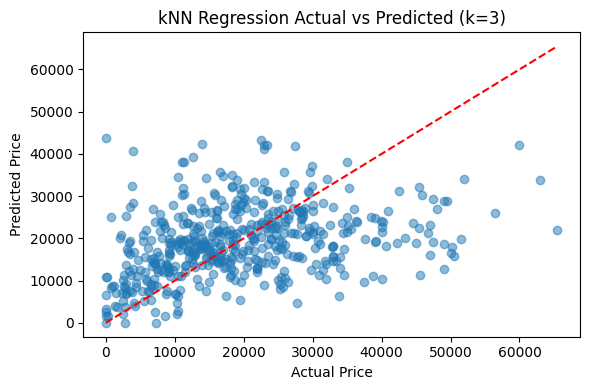

k=10: Mean Squared Error = 117051744.24


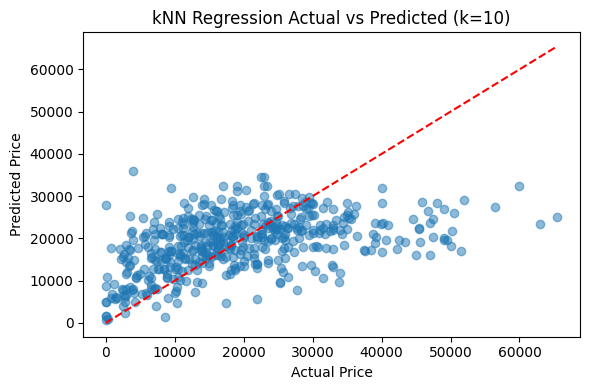

k=25: Mean Squared Error = 108683773.21


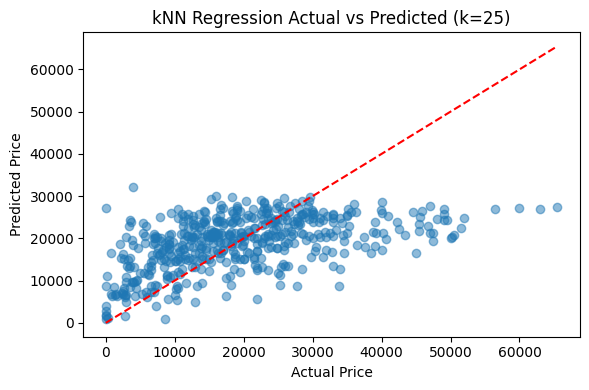

k=50: Mean Squared Error = 107433664.71


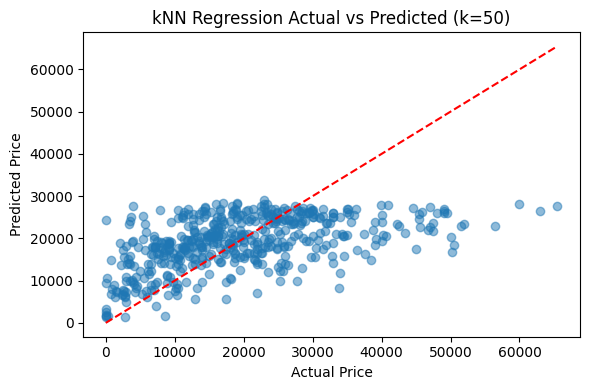

k=100: Mean Squared Error = 107052538.89


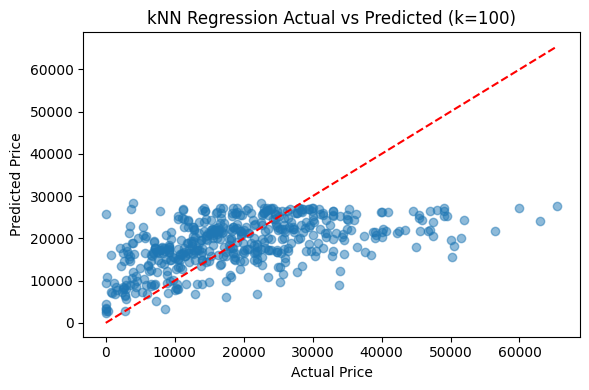

k=300: Mean Squared Error = 109848566.21


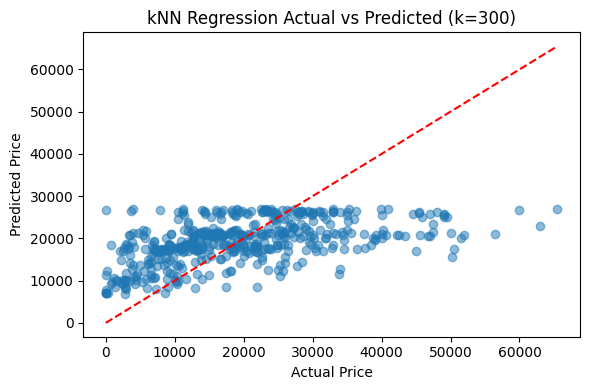

     k      Test_MSE
0    3  1.440646e+08
1   10  1.170517e+08
2   25  1.086838e+08
3   50  1.074337e+08
4  100  1.070525e+08
5  300  1.098486e+08


In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

scaler = MinMaxScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

k_values = [3, 10, 25, 50, 100, 300]
mse_list = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_s, y_train)
    y_pred = knn.predict(X_test_s)

    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    print(f'k={k}: Mean Squared Error = {mse:.2f}')

    plt.figure(figsize=(6,4))
    plt.scatter(y_test, y_pred, alpha=0.5)
    lo = float(min(y_test.min(), y_pred.min()))
    hi = float(max(y_test.max(), y_pred.max()))
    plt.plot([lo, hi], [lo, hi], 'r--')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'kNN Regression Actual vs Predicted (k={k})')
    plt.tight_layout()
    plt.show()
#summary
print(pd.DataFrame({'k': k_values, 'Test_MSE': mse_list}))

#Overall you see the classic U-shaped error curve: small k overfits, very large k underfits, with the sweet spot near k=100.

5.
The optimal k value for the dataset is 100, as it minimizes the mean squared error on the test set.

6. 
When k is small, 3 or 10, the predicted vs. actual plots are kind of all over the place, picking up on every little detail in the training data. this fits into overfitting. As k grows, the predictions start to line up much better with the actual values, and the error drops, hitting its lowest point around k = 100. But if you make k too big, like 300, the predictions start to smooth out too much and miss the really high and low values, which is a sign of underfitting.

